# 들어가며

딥러닝을 공부하는 동안 컴퓨터 비전 분야의 백본 네트워크, AlexNet, VGG, ResNet 등을 들어보셨을 것입니다. 혹시 그 이후에는 어떤 네트워크들이 생겨났고 어떤 방법들을 사용했는지 궁금했던 적 있으셨나요?

딥러닝 업계에서는 한 해에도 수천 편의 논문이 쏟아지고, 2년 전 논문이 금세 당연한 기술이 됩니다. 따라서 딥러닝 공부를 계속하기 위해서는 새로 나오는 논문을 읽고, 최신 기법을 파악하는 것이 중요하다고 할 수 있습니다.

이번 시간에는 딥러닝 논문의 구조를 파악함과 동시에 대표적인 Convolutional Neural Networks (CNNs) 구조를 소개하고자 합니다. 먼저 논문 리딩에 대한 부담을 없애기 위해서 ResNet 논문을 예로 논문의 구조를 간략히 살펴보고 친해지는 시간을 갖도록 하겠습니다. 이후에는 ResNet 다음으로 새롭게 제안된 CNNs 모델들(DenseNet, SENet)을 소개하고 머신 스스로 최적의 구조를 찾는 NAS(Neural Architecture Search), EfficientNet에 대해서도 간략히 짚어 보겠습니다.

**[아이스브레이킹] 백본(backbone) 네트워크라는 이름에서 연상되는 음식은 무엇인가요?**

A. [ 답변을 적어볼까요! ]

<details>
<summary>💡예시답안 확인하기💡</summary>

전 뼈다귀탕이 생각납니다!

## 학습내용
---
- 2. 딥러닝 논문의 구조
  - 딥러닝 논문이 어떻게 구성되어있는지 알아봅니다.
- 3. ResNet의 핵심 개념과 그 효과
  - ResNet의 문제의식과 핵심 개념인 Residual Block을 알아봅니다.
- 4. ResNet 이후 시도 (1) Connection을 촘촘히
  - DesNet을 알아봅니다.
- 5. ResNet 이후 시도 (2) 어떤 특성이 중요할까?
  - SENet을 알아봅니다.
- 6. 모델 최적화하기 (1) Neural Architecture Search
  - NASNet을 알아봅니다.
- 7. 모델 최적화하기 (2) EfficientNet
  - EfficientNet을 알아봅니다.
- 8. 직접 찾아보기
  - 딥러닝 논문을 직접 찾아봅니다.

## 학습 목표
---
- 딥러닝 논문의 구조를 설명할 수 있습니다.
- CNNs 구조 (architecture)의 발전과정을 설명할 수 있습니다.
- 새로 나온 딥러닝 논문을 찾아볼 수 있습니다.

# 딥러닝 논문의 구조

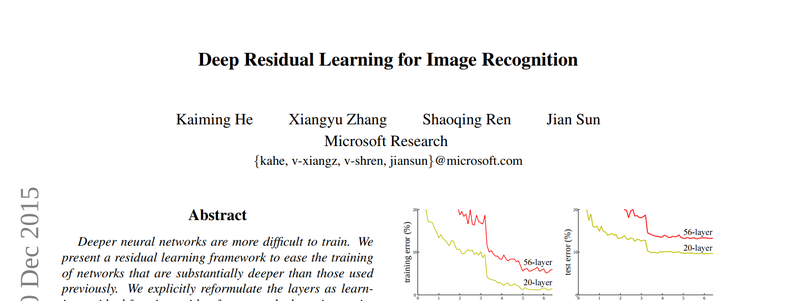

>주요 참고 자료

  - 원본 논문: [Deep Residual Learning for Image Recognition](https://arxiv.org/abs/1512.03385)

[![Images](https://img.youtube.com/vi/ZILIbUvp5lk/0.jpg)](https://youtu.be/ZILIbUvp5lk)

오늘의 이야기는 가장 유명한 딥러닝 기반 컴퓨터 비전 모델 중 하나로 꼽히는 ResNet의 논문으로부터 시작합니다. 2015년 발표된 ResNet의 논문의 제목은 *Deep Residual Learning for Image Recognition* 이라는 제목으로 Kaiming He 등이 작성했습니다. Kaiming He는 2023년 기준 Meta AI Research 소속으로, 딥러닝 분야를 계속 공부하다 보면 많이 접하게 되는 유명한 딥러닝 연구자입니다.

ResNet 논문은 `Residual Block`이라는 아주 간단하면서도 획기적인 개념을 도입하여 딥러닝 모델의 레이어가 깊어져도 안정적으로 학습되면서 모델 성능 개선까지 가능함을 입증하였습니다. 이처럼 딥러닝 분야에서 사용되는 많은 기법들은 논문을 통해서 공개되는 경우가 일반적 입니다.

그렇다면 논문에서는 ResNet 구조의 효과를 어떻게 증명할까요? 일반적으로 컴퓨터 과학과 관련된 많은 연구들은 실험 으로 제안하는 방법의 효과를 보여 줍니다. 중력에 의해 생기는 가속도가 $$9.81m/s^2$$임을 직접 확인하기 위해서 [이런 실험](https://en.wikipedia.org/wiki/Cavendish_experiment)을 해봤던 것처럼 ResNet 논문의 내용을 직접 구현해 실험해 보고 효과를 확인할 수 있습니다.

논문이 제안하는 새로운 방식과 효과를 확인하기 위해서는 논문의 구조를 파악하고 이해할 수 있어야 합니다. 아래에서는 간략히 "논문"이라는 글의 구조를 파악해 보도록 하겠습니다.

## 논문의 형식적 구조
---


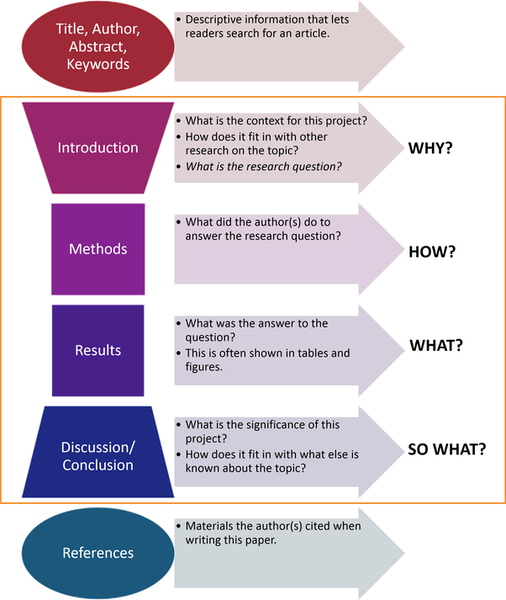

https://www.quora.com/What-is-the-structure-of-research-papers-article

논문은 우리가 평소 읽는 책과 다르게 정형화된 형식을 가지고 있습니다.

ResNet 논문에서도 일반적인 논문의 구조를 만날 수 있습니다.

  - [Deep Residual Learning for Image Recognition](https://arxiv.org/abs/1512.03385)

**초록(abstract)** 은 논문의 요약으로 핵심 아이디어와 논문이 기여하는 점을 포함합니다. 그 뒤로 논문의 주요 내용이 따라오는데요. 논문 내용은 일반적으로 **서론(introduction)** 과 **관련 연구(related work)** , 그리고 제안하는 방법에 관한 **이론 설명** 이 따라옵니다. 이렇게 제안하는 방법을 소개한 후 이 효과를 확인하기 위한 **실험(experiments)** 환경과 결과로 구성됩니다. 그 뒤는 **결론(conclusion)** 으로 전체 논문의 요약과 향후 연구 방향을 소개하기도 합니다.

논문의 내용이 끝나면 뒤로는 **참고문헌(reference)** 이 나오고 때에 따라서 **부록(appendix)** 을 첨부하는 경우도 있습니다. 참고문헌에서는 논문의 설명과 구현에 있어 인용한 논문들의 리스트가 소개되고 부록에서는 미처 본문에서 설명하지 못한 구현 또는 추가적인 실험 설명이 포함됩니다.

이러한 논문의 형식 속에 담고자 하는 논리 구조가 있습니다.

  1. 이전까지의 연구가 해결하지 못했던 문제의식
  2. 이 문제를 해결하기 위한 그동안의 다른 시도들
  3. 문제해결을 위한 이 논문만의 독창적인 시도
  4. 그러한 시도가 가져온 차별화된 성과

서론(Introduction)은 전체 논문의 논리구조를 명확하게 정리하여 제시하는 중요한 역할을 담당하고 있습니다. 이후 관련 연구(Related Work)는 주로 2)의 내용을, 논문의 본론과 실험(Experiments)가 3)의 내용을, Experiment에 포함된 실험 결과와 해석이 4)의 내용을 구체화하여 제시하는 역할을 합니다.

이렇게 작성된 논문은 후속 연구를 진행하는 새로운 논문에 인용됩니다. 새로운 논문에서는 인용된 논문의 한계점을 새로운 문제의식으로 삼아 더 나은 방법과 이론을 제안합니다. 이렇게 문제들이 해결되고 개선되는 과정이 거듭되면서 수 많은 논문들로 이루어진 거대한 생각의 족보를 만들어가게 됩니다. 따라서 논문을 보면서 단순히 그 논문의 내용을 이해하는 것 자체가 중요하기도 하지만, 그 논문이 가지는 역사적인 의의와 그 논문이 처음 제시했던 독창적인 아이디어가 무엇인지를 파악하는 것도 중요합니다.

**Q. ResNet의 논문인 Deep Residual Learning for Image Recognition 에서는 위의 4단계 논리구조가 어떻게 제시되고 있나요? 논문을 열어 이를 확인하고 전체적인 목차와 함께 정리해 봅시다.**

A. [ 답변을 적어볼까요! ]

<details>
<summary>💡예시답안 확인하기💡</summary>

Abstract와 1.Introduction에서 문제의식과 이를 해결하는 솔루션의 전체적 개요를 요약해서 제시한 후  
2.Related Work에서는 본 논문의 솔루션과 유사한 다른 시도들을 언급합니다.  
3.Deep Residual Learning에는 제안 방법의 구체적인 내용과 구현 방법을 소개하고  
4.Experiments에서 비교실험 구조와 다양한 데이터셋에서의 실험결과를 통해 이를 검증합니다  
끝으로 References와 Appendix가 뒤를 잇습니다.

다음 스텝에서는 위 형식에 따라 기술된 ResNet 논문이 제기했던 문제의식 및 이 논문이 제시한 독창적인 해결책, 이를 통해 확인된 실험적 성과의 내용을 살펴보겠습니다.

# ResNet의 핵심개념과 그 효과

## 1) ResNet 논문의 문제의식
서론(Introduction)을 통해 ResNet 논문이 제기하고 있는 문제의 핵심을 명확히 정리해 봅시다. 최초로 제기하는 질문은 딥러닝 모델의 레이어를 깊이 쌓으면 항상 성능이 좋아지는가 하는 것입니다. 그러나 이 질문이 문제의 핵심은 아닙니다. 레이어를 깊이 쌓았을 때 Vanishing/Exploding Gradient 문제가 발생하여 모델의 수렴을 방해하는 문제가 생기는데, 여기에 대해서는 이미 몇 가지 대응 방법이 알려져 있기 때문입니다.

가장 눈에 띄는 키워드는 바로 `Degradation Problem`이라는 표현입니다. 이것은 모델의 수렴을 방해하는 Vanishing/Exploding Gradient 문제와는 달리, 레이어를 깊이 쌓았을 때 모델이 수렴하고 있음에도 불구하고 발생하는 문제입니다. Introduction에서 제시된 아래 그래프가 이 문제의 핵심을 잘 보여줍니다.

아래의 Fig.1의 왼쪽은 학습 에러(training error)입니다. 20개의 레이어를 쌓은 모델이 56개의 레이어를 쌓은 모델보다 학습에러가 낮은 것을 확인 할 수 있습니다. Fig1의 오른쪽은 테스트 에러(test error)입니다. 마찬가지로 20개의 레이어를 쌓은 모델이 56개의 레이어를 쌓은 모델보다 더 좋은 성능을 보여줍니다. 더 깊은 레이어가 오히려 더 큰 에러를 보이고 있고 이는 과적합 문제(over fitting)도 아님을 보여주고 있습니다. 결국 깊은 모델이 제대로 된 최적화를 수행하고 있지 못함을 의미합니다.

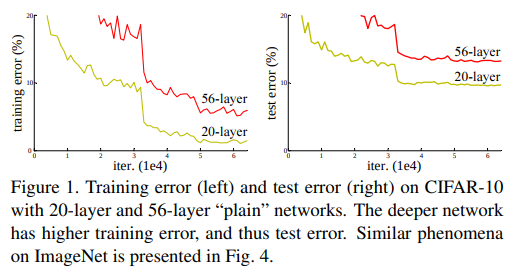

https://arxiv.org/pdf/1512.03385.pdf

**Q. Introduction에서 Vanishing/Exploding Gradient 문제의 해결책으로 언급된 방법에는 어떤 것이 있나요?**

A. [ 답변을 적어볼까요! ]

<details>
<summary>💡예시답안 확인하기💡</summary>

normalized initialization, intermediate normalization layers

**Q. Degradation Problem이란 어떤 현상을 말하나요? Introduction을 상세히 읽어본 후 자신의 표현으로 정리해 봅시다.**

A. [ 답변을 적어볼까요! ]

<details>
<summary>💡예시답안 확인하기💡</summary>

딥러닝 모델의 레이어가 깊어졌을 때 모델이 수렴했음에도 불구하고 오히려 레이어 개수가 적을 때보다 모델의 training/test error가 더 커지는 현상이 발생하는데, 이것은 오버피팅 때문이 아니라 네트워크 구조상 레이어를 깊이 쌓았을 때 최적화가 잘 안되기 때문에 발생하는 문제이다.

## 2) ResNet 논문이 제시한 솔루션 : Residual Block

>ResNet은 깊은 네트워크의 학습이 어려운 점을 해결하기 위해서 레이어의 입력값을 활용하여 레이어가 "residual function"(잔차 함수)을 학습하도록 합니다.

위 문구는 논문 초록의 설명을 개략적으로 번역한 말이라 어렵게 들리실 수 있을 것 같습니다. 단순히 말하자면 일종의 지름길("shortcut connection")을 통해서 레이어가 입력값을 직접 참조하도록 레이어를 변경했다고 보시면 됩니다. Shortcut connection은 앞에서 입력으로 들어온 값을 네트워크의 출력층에 곧바로 더해줍니다. 네트워크는 출력값에서 원본 입력을 제외한 잔차(residual) 함수를 학습하기 때문에 네트워크가 ResNet이라는 이름을 가지게 되었습니다.

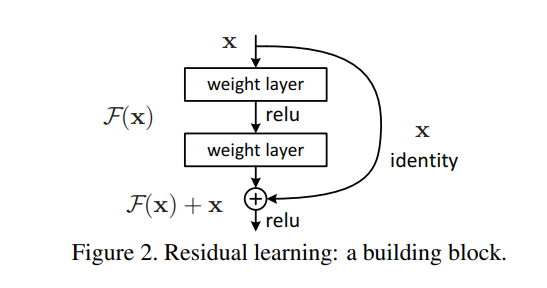

https://arxiv.org/pdf/1512.03385.pdf

레이어를 많이 쌓았다고 해서 모델 성능이 떨어지는 것을 어떻게 설명해야 할까요? 저자들은 이 부분에 의문을 품었습니다. 만약 기존 모델에다가 identity mapping 레이어를 수십 장 덧붙인다고 해서 모델 성능이 떨어질 리는 없을 텐데, 그렇다면 레이어를 많이 쌓았을 때 이 레이어들은 오히려 identity mapping 레이어보다도 못하다는 뜻이 됩니다. 많이 겹쳐 쌓은 레이어가 제대로 학습이 이루어지지 않았다는 반증이 됩니다.

여기서 저자들이 기발한 생각을 합니다. 학습해야 할 레이어 H(x)를 F(x)+x로 만들면 어떨까? 여기서 x는 레이어의 입력값입니다. 그렇다면 설령 F(x)가 Vanishing Gradient현상으로 전혀 학습이 안되어 zero mapping이 될지라도, 최종 H(x)는 최소한 identity mapping이라도 될 테니 성능 저하는 발생하지 않게 된다는 것입니다. 그렇다면 실제로 학습해야 할 F(x)는 학습해야 할 레이어 H(x)에다 입력값 x를 뺀 형태, 즉 잔차(Residual)함수가 되는데, 이것은 H(x)를 직접 학습하는 것보다는 훨씬 학습이 쉽지 않겠냐는 것입니다. 레이어를 깊이 쌓을수록 Residual에 해당하는 F(x)는 0에 가까운 작은 값으로 수렴해도 충분하기 때문입니다. 그리고 실험해 보니 이 구조가 실제로도 안정적으로 학습이 되며, 레이어를 깊이 쌓을수록 성능이 향상되는 것이 확인되었기 때문입니다.

정리하자면, Residual 레이어를 F(x)로 표현하면 이 레이어의 결과는 입력값 x에 대해 F(x)가 됩니다. 여기에 레이어의 입력값 x을 더해주면 최종 출력값은 F(x)+x, 즉 우리가 보통 생각하는 레이어의 결괏값이 되겠지요. 이후 이 값은 ReLU 활성함수(activation function)을 거치게 됩니다. 위 식에서 $$F(x, \{W_i\})$$ 는 학습되어야 할 residual mapping으로서 잔차 학습(residual learning)은 이 식을 학습합니다. ResNet에서는 shortcut connection을 가진 ResNet의 기본 블록을 Residual Block이라고 부릅니다. ResNet은 이러한 Residual Block 여러 개로 이루어집니다.

이러한 shortcut connection의 아이디어는 다양한 레이어에 적용 가능하기 때문에 이후 나온 여러 네트워크 아키텍처에서 활용됩니다.

>❓️ 블록(block)이란 무엇인가요?  
딥러닝 모델은 말 그대로 "깊기" 때문에, 깊은 네트워크를 쌓는 과정에서 레이어를 쌓는 패턴이 반복되기도 합니다. 반복되는 레이어 구조를 묶고, 각 구조 속에서 조금씩 바뀌는 부분은 변수로 조정할 수 있게끔 만들면 레이어 구조를 바꾸며 실험을 할 때에도 편리할 것입니다. 레이어를 묶은 모듈을 "블록"이라고 부르며, 일반적으로 조금씩 변형을 준 블록을 반복적으로 쌓아 딥러닝 모델을 만듭니다.

## 3) Experiments
---
간략히 살펴보셨다시피 딥러닝 논문에서는 모델의 설계를 설명한 뒤 모델을 실제로 구현해 그 효과를 입증합니다. ResNet을 예시로 논문의 실험(experiments) 부분을 조금 더 자세히 살펴봅시다.

ResNet에 추가된 shortcut connection의 아이디어를 검증하려면 어떤 실험을 해야 할까요? 당연히 shortcut connection이 없는 네트워크와 이를 사용한 네트워크를 가지고 성능을 비교해 봐야 할 것입니다.

실제 논문에서는 네트워크가 깊어짐에 따라 발생하는 경사소실(vanishing gradient) 문제를 ResNet이 해결함을 보여주기 위해서, shortcut connection의 유무와 네트워크 깊이에 다르게 한 4가지 모델을 구현합니다. 18개 층과 34개 층을 갖는 네트워크를, 각각 shortcut이 없는 일반 네트워크(plain network)와 shortcut이 있는 ResNet 두 가지로 구현해 총 4가지를 만든 것이지요. 이후 이미지넷(ImageNet) 데이터를 사용해 각 모델을 훈련을 시킨 뒤 효과를 분석합니다.

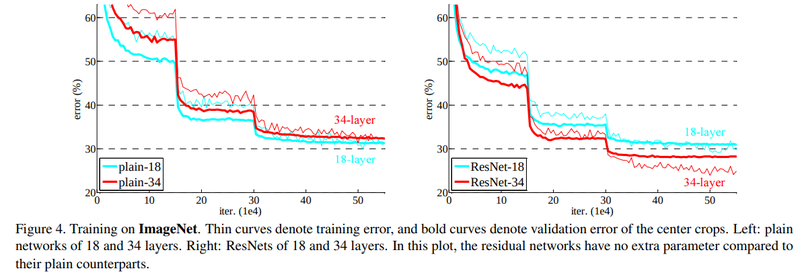

https://arxiv.org/pdf/1512.03385.pdf

위 그림에서 왼쪽은 일반 네트워크 두 개로 네트워크가 깊어지더라도 학습이 잘되지 않는 것을 볼 수 있습니다. 34개 층을 갖는 네트워크가 18개 층을 갖는 네트워크보다 오류율(error rate)이 높지요. 하지만 shortcut이 적용된 오른쪽에서는 레이어가 깊어져도 학습이 잘 되는 효과를 볼 수 있습니다. 그렇다면 이렇게 학습된 모델은 검증 데이터셋(vallidation dataset)에서 어떻게 차이가 날까요?

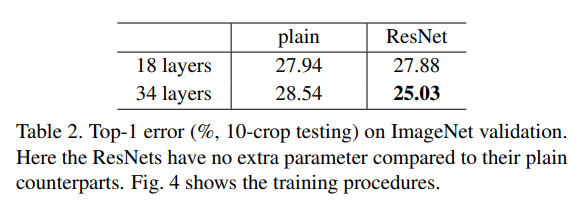

https://arxiv.org/pdf/1512.03385.pdf

위 표는 이미지넷 검증 데이터셋을 사용해 실험한 결과를 나타냅니다. Top-1 error란 모델이 가장 높은 확률 값으로 예측한 class 1개가 정답과 일치하는지 보는 경우의 오류율입니다. Top-5는 모델이 예측한 값들 중 가장 높은 확률 값부터 순서대로 5개 class 중 정답이 있는지를 보는 것이지요. 이 숫자는 당연히 낮을수록 좋습니다.

일반 네트워크("plain")는 레이어가 16개나 늘어나 네트워크가 깊어졌는데도 오류율은 오히려 높아졌습니다. 경사소실로 인해 훈련이 잘되지 않았기 때문입니다. ResNet에서는 잘 훈련된 레이어가 16개 늘어난 효과로 오류율이 2.85% 감소했습니다. 논문에서는 이렇게 간단한 실험으로 Residual Block의 효과를 입증하고 있습니다.

**Q. 어떤 태스크(task)의 모델 간 성능을 비교할 때 널리 사용되어 기준이 되는 데이터셋을 벤치마크 데이터셋이라고 합니다. 이를 통해서 최첨단 성능, 즉 State of the art(SOTA)을 기록하는 모델을 가리기도 하는데요. 논문의 실험에서는 ResNet에 앙상블(ensemble)을 적용한 모델과 다른 앙상블 모델을 비교한 표를 제시합니다. 이 실험에서 ResNet 앙상블의 분류(classification) 태스크 Top-5 error는 얼마였나요? 논문에서 찾아보세요.**

A. [ 답변을 적어볼까요! ]

<details>
<summary>💡예시답안 확인하기💡</summary>

3.57를 기록했습니다.

# ResNet 이후 시도 (1) Connection을 촘촘히

>주요 참고 자료
- 원본 논문: [Densely Connected Convolutional Networks](https://arxiv.org/abs/1608.06993)
- [DenseNet Tutorial 1 Paper Review & Implementation details](https://hoya012.github.io/blog/DenseNet-Tutorial-1/)

ResNet이 보여준 실험 결과를 살펴보면서 "이 정도 성능이면 충분하지 않을까"라는 생각이 드셨을 수 있지만 아직 개선의 여지가 남아있습니다. *Densely Connected Convolutional Networks* , 줄여서 **DenseNet** 의 저자들은 ResNet의 shortcut connection을 마치 Fully Connected Layer처럼 촘촘히 가지도록 한다면 더욱 성능 개선 효과가 클 것이라고 생각하고 이를 실험으로 입증해 보였습니다.



## 1) Dense Connectivity
---

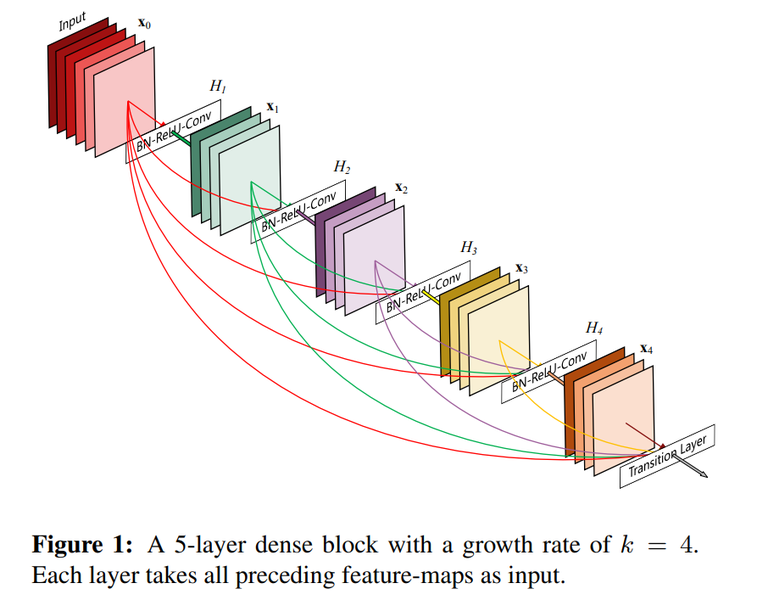

https://arxiv.org/pdf/1608.06993.pdf

일반적인 컨볼루션 네트워크가 L개의 레이어에 대해 각 레이어 간 하나씩의 연결, 즉 총 L개의 연결을 갖는 것과는 달리, DenseNet의 기본 블록은 L 개의 레이어가 있을 때 레이어 간 L(L+1)/2 개의 직접적인 연결(direct connection)을 만듭니다. 이러한 연결 구조를 "dense connectivity" 라고 부르며, 아래처럼 $$H_l$$로 표기하고 이를 합성함수(composite function)라고 부릅니다.

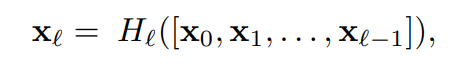

각 레이어는 이전 레이어들에서 나온 특성 맵(feature map) 전부를 입력값으로 받습니다. 위 식에서 $$(X_0, X_1, ...X_{l-1})$$은 0 번째 레이어를 거친 특성 맵부터 l−1 번째 레이어를 거친 특성 맵까지를 의미하며, 이들은 합성함수 H를 거쳐 l 번째 레이어의 출력값이 됩니다. DenseNet은 이를 통해서 경사 소실 문제(gradient vanishing)를 개선하고 특성을 계속 재사용할 수 있도록 합니다.

Shortcut connection이 있어 ResNet과 비슷해 보일 수 있지만 ResNet은 shortcut을 원소별로 단순히 더해주었던 반면, DenseNet은 하나하나를 차원으로 쌓아서(concatenate) 하나의 텐서로 만들어 낸다는 사실이 다릅니다. 또 이전 ResNet의 connection에 다른 연산이 없었던 것과 달리, 합성함수 $$H_l$$은 이 텐서에 대해 배치 정규화(batch normalization, BN), ReLU 활성화 함수, 그리고 3x3 컨볼루션 레이어를 통해서 pre-activation을 수행합니다.

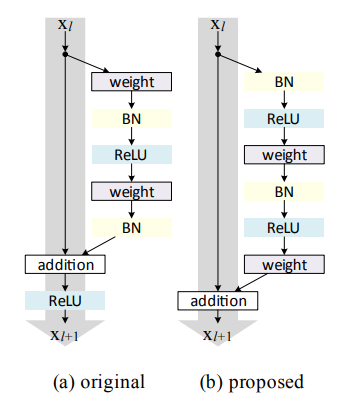

[출처 : He et al. 2016, Identity Mappings in Deep Residual Networks]

https://arxiv.org/pdf/1603.05027.pdf

Pre-activation 개념은 [Identity Mappings in Deep Residual Networks](https://arxiv.org/pdf/1603.05027) 논문에서 제시되었는데요, 위 그림의 (b)에서 보듯 ReLU가 컨볼루션 블록 안으로 들어간 것을 의미합니다. 어떤 역할을 하는지에 대해서는 아래 자료를 참고합시다.

  - [딥 레지듀얼 네트워크 (Deep Residual Network)](https://modulabs.co.kr/blog/deep-residual-network)

**Q. 위의 DenseNet Block은 feed-foward를 포함해서 L(L+1)/2개의 connection을 갖습니다. 그렇다면 DenseNet의 첫번째 Block에는 몇개의 Connection을 가지게 될까요? 첫번째 Dense Block에 몇개의 Conv Block이 사용되었는지 논문에서 확인하시면 쉽게 계산할 수 있습니다.**

A. [ 답변을 적어볼까요! ]

<details>
<summary>💡예시답안 확인하기💡</summary>

21개입니다. 6개의 레이어를 사용했으므로 6(6+1)/2개 즉 21입니다.

## 2) Growth Rate
---
특성 맵을 더해주던 ResNet과 달리 DenseNet에서는 특성 맵을 채널 방향으로 쌓아서 사용합니다. 그렇다면 4개의 채널을 가진 CNN 레이어 4개를 DenseNet 블록으로 만들었을 때, 입력값의 채널 개수가 4인 경우 블록 내 각 레이어의 입력값은 몇 개 채널을 가지게 될까요?

첫 번째 레이어 입력값의 채널은 입력 데이터의 채널 그대로 4입니다. 두 번째 레이어의 입력값은 입력 데이터의 채널 값과, 첫 번째 레이어 출력값의 채널인 4을 더해 8이 됩니다. 그리고 세 번째 레이어는 입력 데이터의 채널 4와 첫 번째 레이어 출력값의 채널 4, 그리고 두 번째 레이어 출력값의 채널 4를 받아 12개의 특성 맵을 입력받고, 네 번째 레이어는 같은 방식으로 16개의 특성 맵을 입력받습니다.

입력값의 채널이 4로 시작했으나 진행할수록 특성 맵의 크기가 매우 커지는 것을 볼 수 있습니다. 이를 제한하기 위해서 논문에서는 growth rate이라는 값을 조정하여 레이어를 거치면서 증가하게 되는 채널의 개수를 조절합니다.

위에서 CNN의 채널 수를 4로 정하였는데 이 값이 growth rate이라고 할 수 있습니다. 블록 내의 채널 개수를 작게 가져가면서 최종 출력값의 특성 맵 크기를 조정할 수 있도록 했다고 합니다. 이외에도 여러 방식이 적용되었으니 [DenseNet Tutorial 1 Paper Review & Implementation details](https://hoya012.github.io/blog/DenseNet-Tutorial-1/) 에서 bottleneck 레이어, transition 레이어, composite function 등에 대해 살펴보고 넘어가시기 바랍니다.

이미지넷 챌린지에 참가하기 위한 DenseNet 구현체는 growth rate로 32를 사용했다고 합니다. 입력값으로 사용되는 이미지넷 데이터에는 3개의 채널이 있고, 이러한 Dense Block 내에 12개의 컨볼루션 레이어가 있을 때 각 레이어에서 입력받는 채널은 몇 개가 될까요? 하단 코드 블록에 파이썬을 사용해 배열로 나타내고 실행하여 결과를 출력해 봅시다.

In [ ]:
# Q. Dense Block내의 각 레이어 output의 channel을 계산하는 함수를 적어보세요.
def get_channel_list():
    channel_list = []
    # [[YOUR CODE]]
    return channel_list

get_channel_list()

# 결과가 [32, 64, 96, 128, 160, 192, 224, 256, 288, 320, 352, 384] 이 나오면 정상적으로 구현된 것입니다.

# ResNet 이후 시도 (2) 어떤 특성이 중요할까?

>주요 참고 자료
- 원본 논문: [Squeeze-and-Excitation Networks](https://arxiv.org/abs/1709.01507)
- [jayhey님의 gitblog SENet(Squeeze and excitation networks)](https://jayhey.github.io/deep%20learning/2018/07/18/SENet/)

네트워크 구조를 연달아 다루어 조금 질리실 수 있을 것 같습니다. 이제 마지막 네트워크, SENet 을 살펴보겠습니다. **SENet**은 Squeeze-and-Excitation Networks의 줄임말인데요. 어떤 것을 "squeeze and excite" 한다는 것일까요?

일반적인 CNN은 입력에 대해서 컨볼루션 필터를 필터 사이즈(filter size)에 따라 적용합니다. 이때 필터의 개수가 곧 컨볼루션 레이어 출력값의 채널 개수가 됩니다. SqueezeNet에서는 이때 채널 방향으로 global average pooling을 적용, 압축된 정보를 활용하여 중요한 채널이 활성화되도록 합니다. 어떻게 보면 CNN에서 나온 특성 맵의 채널에 어텐션(attention) 매커니즘을 적용한 블록을 만들어냈다고 볼 수 있습니다. 이런 SENet은 2017 ILSVRC 분류 문제(classification task)에서 1등을 하게 됩니다.

[![Images](https://img.youtube.com/vi/6aouXD8WMVQ/0.jpg)](https://youtu.be/6aouXD8WMVQ)

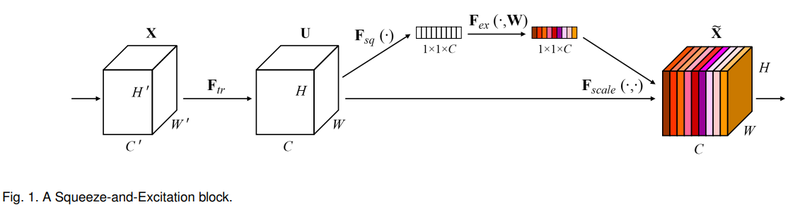

https://arxiv.org/pdf/1709.01507.pdf

## 1) Squeeze
---

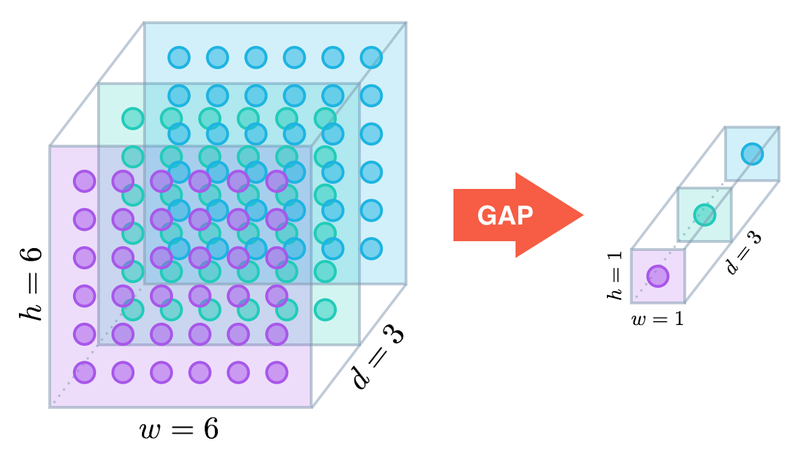

[GAP(Global Average Pooling) 과정]

https://jamelt.com/blog/shelf-detection/

**Squeeze** 는 말 그대로 특성에서 중요한 정보를 짜내는 과정입니다. 특성 맵의 채널에서 어느 채널이 중요한지 정보를 만들기 위해서는 우선 채널에 따른 정보를 압축해서 가져와야 하겠지요.

어떻게 채널별 정보를 압축할 수 있을까요? 일반 CNN에서도 많이 사용하듯, 풀링(pooling) 기법을 사용하면 됩니다. 풀링은 보통 커널(kernel) 영역의 정보를 압축하는 데 사용하지요. 커널 영역에 대해 최댓값만 남기는 것이 Max Pooling, 평균값을 남기는 것이 Average Pooling이었습니다.

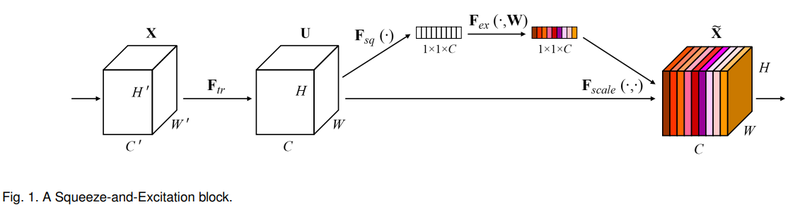

https://arxiv.org/pdf/1709.01507.pdf

>다시 한번 그림을 살펴볼까요? 여기서 "Squeeze"는 $$F_sq$$함수에서 일어납니다. $$F_tr$$이라는 컨볼루션 레이어를 거치면 "HxWxC"의 크기를 가진 특성 맵 U 가 나옵니다. U 에 Squeeze를 적용하면 "1x1xC"의 크기가 나오게 됩니다. 벡터의 차원으로 보실 수 있듯이 각 채널별로 딱 1개의 숫자만 남도록 2D 특성맵 전체에 대해 평균값을 남기는 global average pooling을 수행했습니다. 이렇게 얻어진 "1x1xC"의 벡터는 채널별 정보를 압축해 담고 있습니다

## 2) Excitate
---
채널별 정보를 짜내는 데 성공했습니다. 이제 채널별 정보에 따라 어떤 채널을 강조해야 할지 판단하면 됩니다.

>채널을 강조하는 것을 논문에서는 "excitation"으로 표현하며, 수식은 다음과 같습니다. 이전에 봤던 전체 네트워크 그림의 $$F_{ex}$$식이지요.

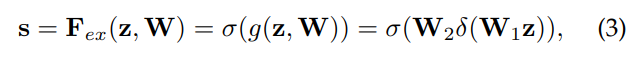

https://arxiv.org/pdf/1709.01507.pdf

>수식은 매우 부담스러울 수 있지만 하나씩 살펴보면 간단합니다.  
- z 는 위에서 global average pooling을 적용한 특성, 즉 "squeeze" 활동의 결과물입니다.
- 이 특성에 $$W_1$$을 곱해주는 linear 레이어를 거치고 ReLU 활성화 함수 δ 를 거칩니다.
- 이후 두 번째 $$W_2$$를 곱해주는 linear layer를 거치고 마지막으로 시그모이드 활성화 함수 σ을 거칩니다.


이때 시그모이드를 사용하는 이유는 가장 중요한 하나의 채널만 활성화되는 것이 아닌, 여러 채널들이 서로 다른 정도로 활성화되도록 하기 위함입니다. 데이터셋에 정답 라벨이 하나뿐인 단순 분류 모델의 활성화 함수로는 소프트맥스(SoftMax)를 사용해서 단 하나의 최댓값을 찾지만, 하나의 대상에도 여러 개의 클래스의 정답 라벨을 지정할 수 있는 다중 라벨 분류(multi label classification)에서는 시그모이드를 사용하는 것과 같은 방식입니다.

  - 참고: [다중 레이블 분류 (Multi-Label Classification)](https://modulabs.co.kr/blog/multi-label-classification)

이렇게 계산된 벡터를 기존의 특성 맵에 채널에 따라서 곱해주어 중요한 채널이 활성화 되도록 만들어줍니다.

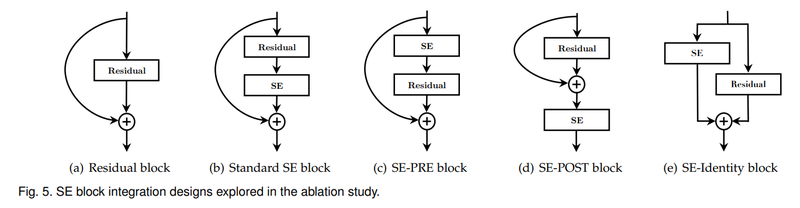

https://arxiv.org/pdf/1709.01507.pdf

**Q. SENet은 단독 네트워크로 사용하는 것 외에도 이전에 사용되던 네트워크와 유연하게 결합될 수 있음을 장점으로 삼습니다. 위에서 보았듯이 CNN 레이어에서 출력한 특성 맵에 애드온(add-on) 형식으로 자유롭게 추가해서 붙일 수 있기 때문이지요. 논문에서는 ResNet-50 네트워크에 위처럼 다양한 방법으로 SENet을 적용하여 실험을 했는데요. 어떤 방법이 제일 좋은 성능을 보였을지 고민해보고 논문에서 정답을 찾아봅시다.**

A. [ 답변을 적어볼까요! ]

<details>
<summary>💡예시답안 확인하기💡</summary>

SE-Identity가 가장 좋은 성능을 보였습니다. 하지만 큰 차이는 없었습니다. 논문의 TABLE 14에서 확인할 수 있습니다.

# 모델 최적화하기 (1) Neural Architecture Search

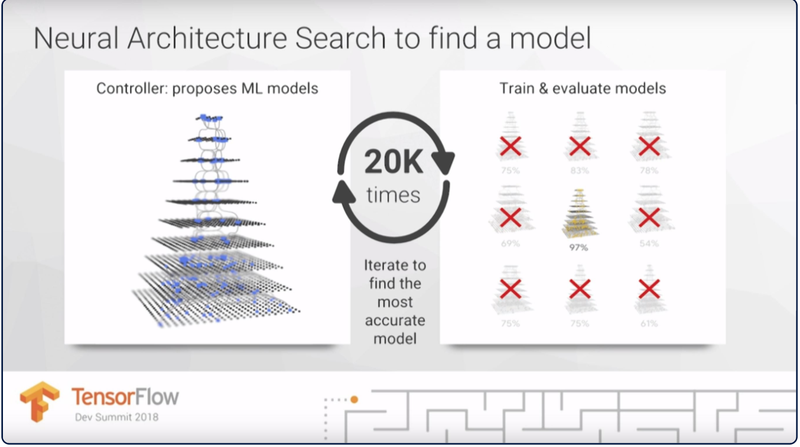

[출처 : https://mc.ai/neural-networks-with-push-button-ai-for-all/]

지금까지 봤던 방법은 사람이 고안한 방식을 네트워크 구조에 적용하여 효과를 봤던 방법입니다. 모델의 훈련은 컴퓨터가 시켜줄 수 있어도, 어떤 모델 구조가 좋을지는 사람이 직접 고민하고 실험해 보아야 했죠. 이렇게 새로운 모델 구조를 고안하고 이해하는 과정을 반복하다 보면, "우리가 딥러닝으로 이미지 분류 문제를 풀기 위해 딥러닝 모델의 파라미터(parameter)를 최적화해 왔듯이 모델의 구조 자체도 최적화할 수는 없을지" 생각하게 됩니다. 이렇게 여러 가지 네트워크 구조를 탐색하는 것을 아키텍쳐 탐색(architecture search)라고 합니다. 그리고 그중 신경망을 사용해 모델의 구조를 탐색하는 접근 방법을 **NAS(neural architecture search)** 라고 합니다.

NASNet은 NAS에 강화학습을 적용하여 500개의 GPU로 최적화한 CNN 모델들인데요. 직접 모델 탐색을 할 환경을 구축하지 않더라도 텐서플로우에서 이미지넷 2012년 데이터셋에 최적화된 구조의 pre-trained NASNet 모델을 쉽게 사용할 수 있습니다 ([참고](https://www.tensorflow.org/api_docs/python/tf/keras/applications/nasnet)). 그렇다면 NasNet은 어떤 방법으로 만들어졌는지 대략적으로 살펴보도록 합시다.

## 1) NASNet
---
>주요 참고 자료
- 원본 논문: [Learning Transferable Architectures for Scalable Image Recognition](https://arxiv.org/abs/1707.07012)
- [논문리뷰 - Neural Architecture Search with Reinforcement Learning(https://modulabs.co.kr/blog/neural-architecture-search-with-reinforcement-learning)


NASNet과 같이 거창한 방법이 아니더라도, 일반적으로 머신 러닝에서는 그리드 탐색(grid search) 등으로 실험과 모델 셋팅(config)를 비교하기 위한 자동화된 방법을 사용하곤 합니다. 그리드 탐색은 간단히 말하면 모든 조합을 실험해보는 것입니다. 그러나 그리드 탐색과 같은 방법으로 접근할 경우 모델에서 바꿔볼 수 있는 구성의 종류가 매우 많아 머신 러닝 중에서도 학습이 오래 걸리는 딥러닝에서는 적합하지 않습니다.

딥러닝에서 모델을 탐색하기 위해 강화학습 모델이 대상 신경망의 구성(하이퍼파라미터)을 조정하면서 최적의 성능을 내도록 하는 방법이 제안되었으며, NASNet은 그중 하나입니다. 아키텍쳐 탐색을 하는 동안 강화학습 모델은 대상 신경망의 구성을 일종의 변수로 조정하면서 최적의 성능을 내도록 합니다. 우리가 지금까지 보아왔던 레이어의 세부 구성, CNN의 필터 크기, 채널의 개수, connection 등이 조정할 수 있는 변수가 됩니다. 이렇게 네트워크 구성에 대한 요소들을 조합할 수 있는 범위를 탐색 공간(search space)이라고 합니다. 이 공간에서 최고의 성능을 낼 수 있는 요소의 조합을 찾는 것이지요.

NASNet이 NAS를 처음 적용한 것은 아니며 이전에도 논문들이 있었습니다. 이전의 방식들은 우리가 많이 접해왔던 MNIST에 최적화하는데 800개의 GPU를 사용해서 28일이 걸렸다고 합니다. 그렇게 나온 구조가 아래의 그림입니다.

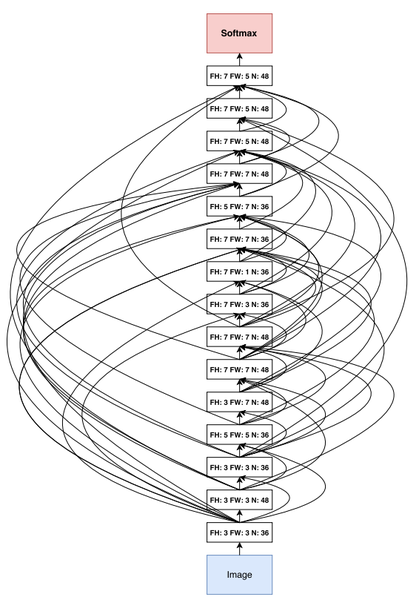

https://arxiv.org/pdf/1707.07012.pdf

NASNet 논문은 이미지넷 데이터에 대해 이보다 짧은 시간 안에 최적화를 했다고 합니다. 어떻게 한 것일까요?

## 2) Convolution cell
---

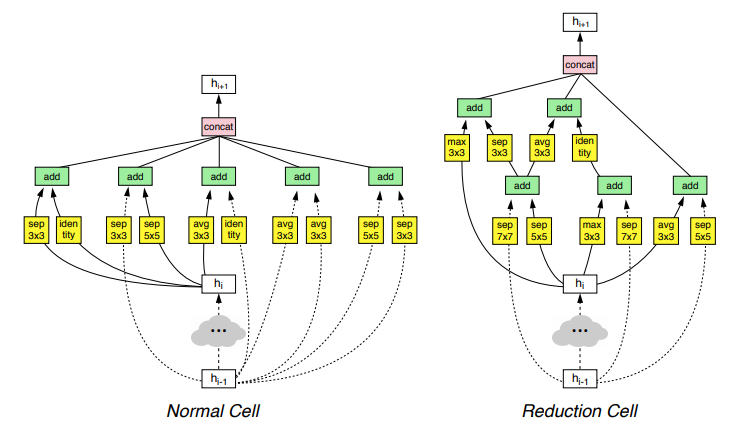

https://arxiv.org/pdf/1707.07012.pdf

레이어 하나마다의 하이퍼 파라미터를 조절한다면 탐색 공간이 무지막지 방대해질 겁니다. 탐색 공간이 넓다는 말은 찾아야 할 영역이 넓다는 의미이고 넓은 곳에서 최적의 포인트를 찾는 데는 당연히 더 오랜 시간이 걸리겠죠. NASNet 논문에서는 이러한 탐색 공간을 줄이기 위해서 모듈(cell) 단위의 최적화를 하고 그 모듈을 조합하는 방식을 채택합니다.

ResNet에는 Residual Block, DenseNet에는 Dense Block이라는 모듈이 사용되는데, 논문에서는 이와 유사한 개념을 convolution cell이라고 부릅니다. Convolution cell은 normal cell과 reduction cell로 구분됩니다. Normal cell은 특성 맵의 가로, 세로가 유지되도록 stride를 1로 고정합니다. Reduction cell은 stride를 1 또는 2로 가져가서 특성 맵의 크기가 줄어들 수 있도록 합니다. 논문의 모델은 normal cell과 reduction cell 내부만을 최적화하며, 이렇게 만들어진 convolution cell이 위 그림의 두 가지입니다. 두 가지 cell을 조합해 최종 결과 네트워크(NASNet)를 만들었으며, 좀 더 적은 연산과 가중치로 SOTA(state-of-the-art) 성능을 기록했다고 하네요.

**Q. NASNet 을 한줄로 정리해 봅시다.**

A. [ 답변을 적어볼까요! ]

<details>
<summary>💡예시답안 확인하기💡</summary>

기존에 사람이 conv block을 만들었다면, NASNet은 강화학습과 RNN을 활용해 block을 설계하였다.

# 모델 최적화하기 (2) EfficientNet

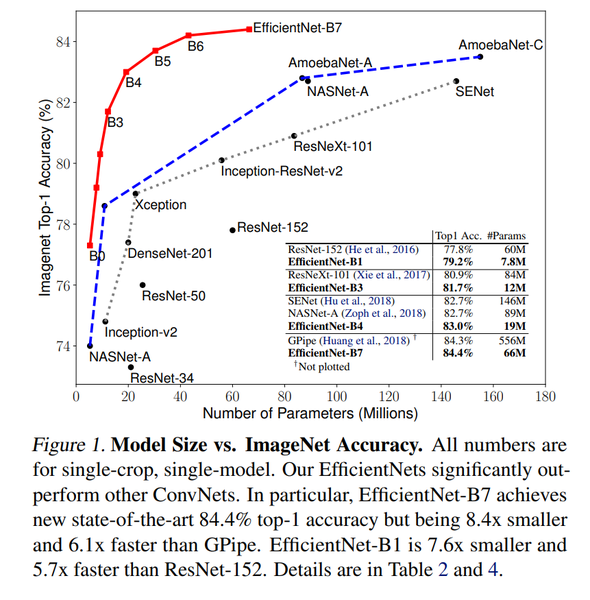

https://arxiv.org/pdf/1905.11946.pdf

>주요 참고 자료
- 원본 논문: [EfficientNet: Rethinking Model Scaling for Convolutional Neural Networks](https://arxiv.org/abs/1905.11946)
- [hoya012님의 EfficientNet： Rethinking Model Scaling for Convolutional Neural Networks 리뷰](https://hoya012.github.io/blog/EfficientNet-review/)

이번에 살펴볼 접근 방법은 2019년 발표된 EfficientNet입니다. EfficientNet의 강력함은 위의 그래프로 한눈에 볼 수 있습니다. 기존 모델들의 오류율을 뛰어넘을 뿐만 아니라 모델의 크기인 "Number of Parameters" 또한 최적화된 것을 볼 수 있습니다. 빨간색 선이 EfficientNet의 모델들이고 그 아래로 각 점에 따라서 이전에 봐왔던 모델들이 있는 것을 볼 수 있습니다. 정확도를 얻는 데 다른 네트워크들은 무지막지한 파라미터의 수를 사용한 반면 EfficientNet은 작고 효율적인 네트워크를 사용했다고 볼 수 있습니다.

EfficientNet은 우리가 이미지에 주로 사용하는 CNN을 효율적으로 사용할 수 있도록 네트워크의 형태를 조정할 수 있는 `width`, `depth`, `resolution` 세 가지 요소에 집중합니다. 여기서 `width`는 CNN의 채널에 해당합니다. 채널을 늘려줄수록 CNN의 파라미터와 특성을 표현하는 차원의 크기를 키울 수 있습니다. `depth`는 네트워크의 깊이입니다. ResNet은 대표적으로 네트워크를 더 깊게 만들 수 있도록 설계해 성능을 올린 예시입니다. 마지막으로 resolution은 입력값의 너비(w)와 높이(h) 크기입니다. 입력이 클수록 정보가 많아져 성능이 올라갈 여지가 생기지만 레이어 사이의 특성 맵이 커지는 단점이 있습니다.



## Compound scaling
---
EfficientNet은 앞서 말한 `resolution`, `depth`, `width`를 최적으로 조정하기 위해서 앞선 NAS와 유사한 방법을 사용해 기본 모델(baseline network)의 구조를 미리 찾고 고정해둡니다. 모델의 구조가 고정이 되면 효율적인 모델을 찾는다는 커다란 문제가, 개별 레이어의 `resolution`, `depth`, `width` 를 조절해 기본 모델을 적절히 확장시키는 문제로 단순화됩니다.

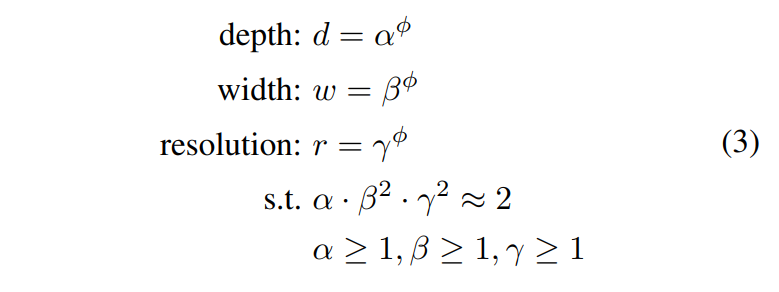

https://arxiv.org/pdf/1905.11946.pdf

그리고 EfficientNet 논문에서는 resolution, depth, width라는 세 가지 "scaling factor"를 동시에 고려하는 compound scaling을 제안합니다. 위 식에서 compound coefficient ϕ는 모델의 크기를 조정하기 위한 계수가 됩니다. 위 식을 통해 레이어의 resolution, depth, width를 각각 조정하는 것이 아니라 고정된 계수 ϕ에 따라서 변하도록 하면 보다 일정한 규칙에 따라(in a principled way) 모델의 구조가 조절되도록 할 수 있습니다.

논문은 우선 ϕ를 1로 고정한 뒤 resolution과 depth, width을 정하는 α,β,γ의 최적값을 찾습니다. 논문에서는 앞서 설명했던 그리드 탐색으로 α,β,γ을 찾을 수 있었다고 설명합니다. 이후 α,β,γ, 즉 resolution과 depth, width의 기본 배율을 고정한 뒤 compound coefficient ϕ를 조정하여 모델의 크기를 조정합니다.


**Q. EfficientNet 논문에서 모델을 크게 만드는 방법을 정리해 봅시다.**

A. [ 답변을 적어볼까요! ]

<details>
<summary>💡예시답안 확인하기💡</summary>

network의 depth를 깊게 만드는 것  
channel width를 늘리는 것  
input image의 해상도를 올리는 것

# 직접 찾아보기

## 1) 내가 하고싶은 분야 논문 찾아보기
---
컴퓨터 비전을 공부하시면서 AlexNet, VGG, ResNet부터 오늘 다룬 DenseNet, SENet, NASNet, EfficientNet 등 다양한 아키텍처를 접하셨을 것입니다. 이렇게 유명한 네트워크들은 앞으로 이미지를 다루게 된다면 즐겨 사용하게 될 기법들이 하나씩 담겨있습니다. 세부사항을 모두 기억할 필요는 없지만, 지금까지 어떤 아이디어들이 제안되었는지 기억하면 새로운 모델을 만드는 데 도움이 됩니다. 앞으로 세부 분야를 정해 배우고 공부하실 때에도 필요할 때 알맞은 논문과 방법을 찾고 이를 활용하는 것은 매우 중요한 능력이 될 것입니다.

그런 점에서 이번에는 컴퓨터 비전의 주요 태스크 중 관심 있는 논문을 직접 찾아보는 시간을 갖도록 하겠습니다. 딥러닝과 컴퓨터 비전을 접한 지 얼마 되지 않으셨다면 이미지를 분류(classification task)하기 위해 최적화된 모델의 아키텍처를 다룬 논문을 주로 보셨을 것입니다. 이 다음으로는 물체 검출(detection), 그리고 물체의 영역을 분리해내는 세그멘테이션(segmentation) 등의 다양한 태스크(task)를 딥러닝으로 푸는 논문들을 읽어보실 수 있습니다.

  - 참고: [컴퓨터 비전 활용 분야](https://modulabs.co.kr/blog/computer-vision-part)


**Q. 자신이 이미지로 해보고 싶은 분야(예: object detection, segmentation 등)를 선택한 후, 그 분야에서 관심이 가는 논문을 찾아 목록으로 정리해 보세요.**

A. [ 답변을 적어볼까요! ]

<details>
<summary>💡예시답안 확인하기💡</summary>

저는 최근에 Few shot object detection이라는 분야에 관심이 생겨 Few-Shot Object Detection and Viewpoint Estimation for Objects in the Wild를 읽고 싶습니다.

## 2) 간단히 요약해보기
---
조사를 하면서 너무 많은 논문이 있다고 생각하셨을 수 있습니다. 우선 하나를 뽑아 요점을 정리해보는 시간을 갖도록 하겠습니다. 오늘 소개된 네트워크들은 각자 블로그의 자세한 리뷰나 정리된 자료를 볼 수 있었습니다. 그 정도로 자세하게 정리하기 위해서는 논문을 여러 번 읽어야 하고 시간이 많이 드니 우리는 논문 내용을 딱 두 줄로 정리해보도록 하겠습니다.

**Q. 고른 논문 또는 네트워크의 주요 내용을 요약해 보세요.**

**예시) ResNet**

**해결하고자 하는 것: 모델의 레이어가 깊어지더라도 성능이 증가하지 않고 학습이 되지않는 Gradient descent 문제를 해결하고자 합니다.
적용한 방법: 블록의 Input을 skip connection을 통해 output에 더해줌으로써 정보가 소실되지 않고 깊은 레이어까지 전달되도록 합니다.**

# 마무리하며

## 종합 문제
---
지금까지 여러가지 백본 네트워크들을 살펴보았습니다.

backbone network는 computer vision task의 핵심적인 구성요소 입니다. 가장 중요한 ResNet의 핵심적인 아이디어를 살펴봤고, 이후 ResNet의 영향을 받아 만들어진 pre-activation ResNet, DenseNet, SENet 등이 있었습니다. 또한 모델 최적화를 위해 Neural Architecture Search, EfficientNet 이 있었습니다.

지금부터 여러분들이 얼마나 학습을 충실히 하셨는지 알아보려고 합니다. 배운 내용을 다시 생각하면서 아래의 퀴즈를 풀어보세요.

**Q. 일반적인 논문의 형식적 구조를 기술해봅시다.**

A. [ 답변을 적어볼까요! ]

<details>
<summary>💡예시답안 확인하기💡</summary>

초록(abstract) -> 서론(introduction) 및 관련 연구(related work) -> 제안하는 방법에 관한 이론 설명-> 실험(experiments) -> 결론(conclusion)

**Q. ResNet의 핵심적인 내용을 요약해 봅시다.**

A. [ 답변을 적어볼까요! ]

<details>
<summary>💡예시답안 확인하기💡</summary>

기존의 Deeper neural networks를 training 하는것은 훨씬 어려운데, training을 쉽게 하기위해 Residual Learning Framework 제시했습니다. Unreferenced function을 학습하는 대신, layer input을 reference하는 residual functions을 학습하도록 layer를 명시적으로 reformulate 했습니다. 즉 여러개의 conv layer와 skip connection을 추가한 구조인 Residual Block을 제안했습니다.

Residual networks는 Degradation Problem을 해결하여 optimization 하기 더 쉬운 구조로 만들며, Deeper Model의 학습이 제대로 안되더라도 적어도 Shallow Model 만큼의 성능은 보장됩니다. 이로인해 2015 ILSVRC 에서 우승하였습니다.

학습을 충실히 하셨다면 쉽게 해결하셨을 것이라 생각합니다. 혹시라도 답을 맞추지 못하셨다면 다시 한번 배웠던 내용을 복습해보세요.

지금까지 수고 많이 하셨습니다.